In [49]:
%matplotlib inline
%config IPCompleter.greedy=True

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import networkx as nx

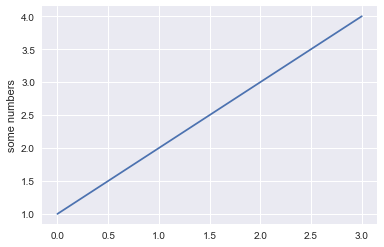

In [7]:
plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.show()

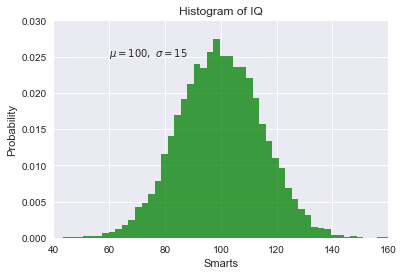

In [8]:
# Fixing random state for reproducibility
np.random.seed(19680801)

mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

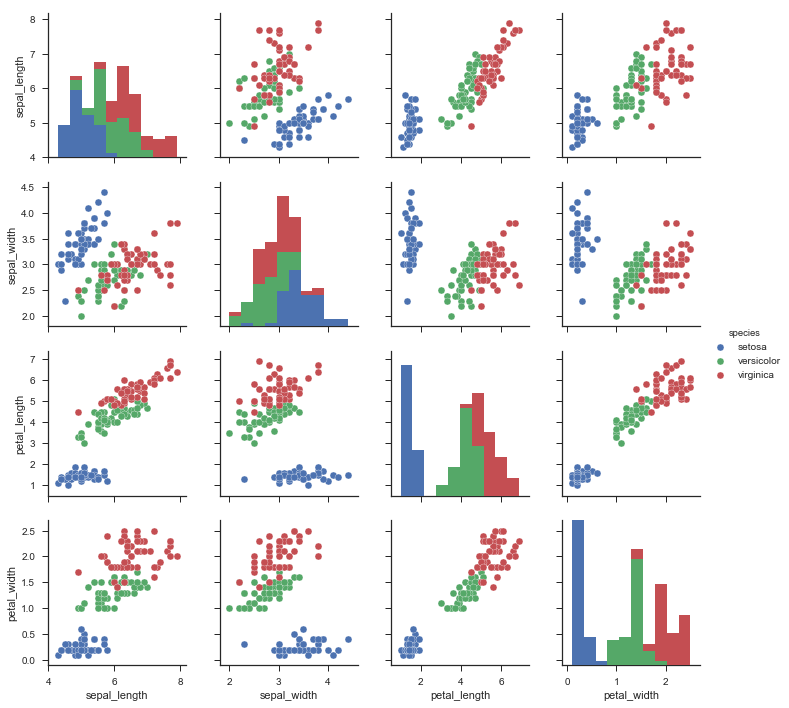

In [9]:
sns.set(style="ticks")

df = sns.load_dataset("iris")
sns.pairplot(df, hue="species")

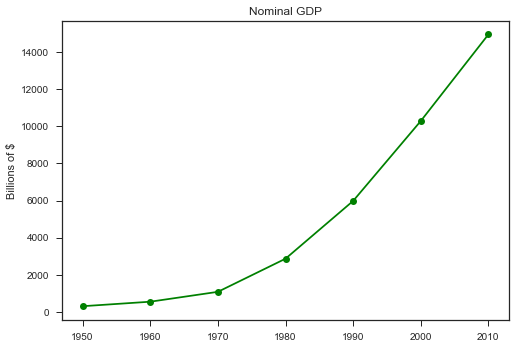

In [10]:
years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3] # create a line chart, years on x-axis, gdp on y-axis
plt.plot(years, gdp, color='green', marker='o', linestyle='solid') # add a title
plt.title("Nominal GDP")
# add a label to the y-axis
plt.ylabel("Billions of $")
plt.show()

In [11]:
df_ecobici = pd.read_csv("2010-02.csv")
df_ecobici.columns

Index(['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro',
       'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo',
       'Hora_Arribo'],
      dtype='object')

In [12]:
edades = df_ecobici[df_ecobici["Genero_Usuario"] == "F"]
edades.describe()

,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Ciclo_Estacion_Arribo
count,115.000000,115.00000,115.000000,115.000000
mean,35.156522,486.00000,33.573913,32.634783
std,8.962486,245.94911,28.656790,27.282901
min,25.000000,5.00000,2.000000,4.000000
25%,27.000000,311.50000,12.500000,13.000000
50%,33.000000,515.00000,21.000000,20.000000
75%,37.000000,684.50000,52.000000,49.000000
max,63.000000,926.00000,85.000000,85.000000


In [13]:
fechas = df_ecobici[["Fecha_Retiro","Hora_Retiro"]]
print(fechas["Fecha_Retiro"][0])
print(type(fechas["Fecha_Retiro"][0]))

2010-02-16
<class 'str'>


In [14]:
df_ecobici["Fecha_Hora_Retiro"] = pd.to_datetime(
    df_ecobici["Fecha_Retiro"].map(str) + " " +  df_ecobici["Hora_Retiro"])
df_ecobici["Fecha_Hora_Arribo"] = pd.to_datetime(
    df_ecobici["Fecha_Arribo"].map(str) + " " +  df_ecobici["Hora_Arribo"])

In [15]:
df_ecobici.dtypes

Genero_Usuario                   object
Edad_Usuario                      int64
Bici                              int64
Ciclo_Estacion_Retiro             int64
Fecha_Retiro                     object
Hora_Retiro                      object
Ciclo_Estacion_Arribo             int64
Fecha_Arribo                     object
Hora_Arribo                      object
Fecha_Hora_Retiro        datetime64[ns]
Fecha_Hora_Arribo        datetime64[ns]
dtype: object

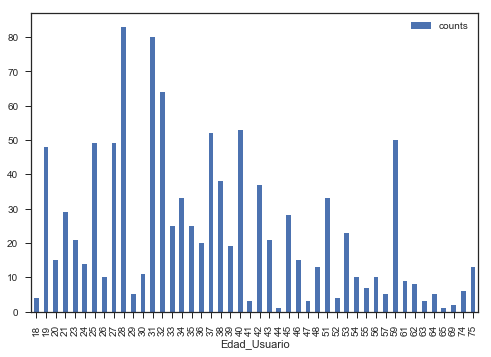

In [20]:
ages = df_ecobici.groupby(['Edad_Usuario']).size().reset_index(name='counts')
ages.plot.bar(x="Edad_Usuario", y="counts")

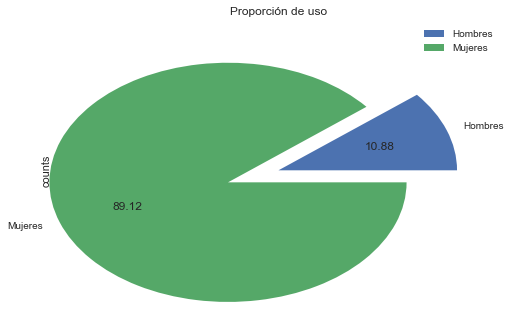

In [47]:
genres = df_ecobici.groupby(['Genero_Usuario']).size().reset_index(name='counts')
counts = genres["counts"].value_counts()
genres.plot.pie(y="counts", title="Proporción de uso", labels=["Hombres","Mujeres"], autopct="%.2f", explode=(0,0.3))